<a align="left" href="https://ultralytics.com/yolov5" target="_blank">


This is the **official YOLOv5 🚀 notebook** authored by **Ultralytics**, and is freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/). 
For more information please visit https://github.com/ultralytics/yolov5 and https://ultralytics.com. Thank you!

# Setup

Clone repo, install dependencies and check PyTorch and GPU.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu102 (Tesla T4)


In [ ]:
## Dataset

In [6]:
cd datasets/

/content/datasets


In [4]:
pwd

'/content/yolov5'

In [ ]:
#upload your dataset
# Tree structure
datasets 
        ---->customim
                        --->images
                                  -->train
                                          -->001.jpg
                                          -->002.jpg
                                          ...
                        --->labels
                                  -->train
                                          -->001.txt
                                          -->002.txt
                                          ...

### Upload your dataset with like above tree

In [8]:
from google.colab import files
one = files.upload()

Saving customim.zip to customim.zip


In [9]:
!unzip customim.zip

Archive:  customim.zip
   creating: customim/
   creating: customim/images/
   creating: customim/images/train/
  inflating: customim/images/train/001.jpg  
 extracting: customim/images/train/002.jpg  
  inflating: customim/images/train/003.jpg  
  inflating: customim/images/train/004.jpg  
 extracting: customim/images/train/005.webp  
  inflating: customim/images/train/006.jpg  
  inflating: customim/images/train/007.jpg  
  inflating: customim/images/train/008.jpg  
  inflating: customim/images/train/009.jpg  
  inflating: customim/images/train/010.jpg  
  inflating: customim/images/train/011.jpg  
  inflating: customim/images/train/012.jpg  
  inflating: customim/images/train/013.jpg  
  inflating: customim/images/train/014.jpg  
  inflating: customim/images/train/015.jpg  
  inflating: customim/images/train/016.jpg  
  inflating: customim/images/train/017.jpg  
  inflating: customim/images/train/018.jpg  
  inflating: customim/images/train/019.jpg  
  inflating: customim/images/tra

# 3. Train



In [12]:
cd yolov5/

/content/yolov5


In [26]:
# Train for 200 epochs
!python train.py --img 640 --batch 16 --epochs 200 --data coco128.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=200, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache_images=True, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1
github: ⚠️ WARNING: code is out of date by 2 commits. Use 'git pull' to update or 'git clone https://github.com/ultralytics/yolov5' to download latest.
YOLOv5 🚀 v5.0-307-g39ef6c7 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h

### Test images

In [27]:
#upload your test images
from google.colab import files
one = files.upload()


Saving test.zip to test.zip


In [29]:
!unzip test.zip

Archive:  test.zip
   creating: test/
  inflating: test/001.jpg            
  inflating: test/002.jpg            
  inflating: test/003.jpg            
  inflating: test/004.jpg            


In [30]:
!python detect.py --weights runs/train/exp5/weights/last.pt --img 640 --conf 0.25 --source test/
#Image(filename='runs/detect/exp/zidane.jpg', width=600)

detect: weights=['runs/train/exp5/weights/last.pt'], source=test/, imgsz=640, conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-307-g39ef6c7 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 224 layers, 7056607 parameters, 0 gradients, 16.3 GFLOPs
image 1/4 /content/yolov

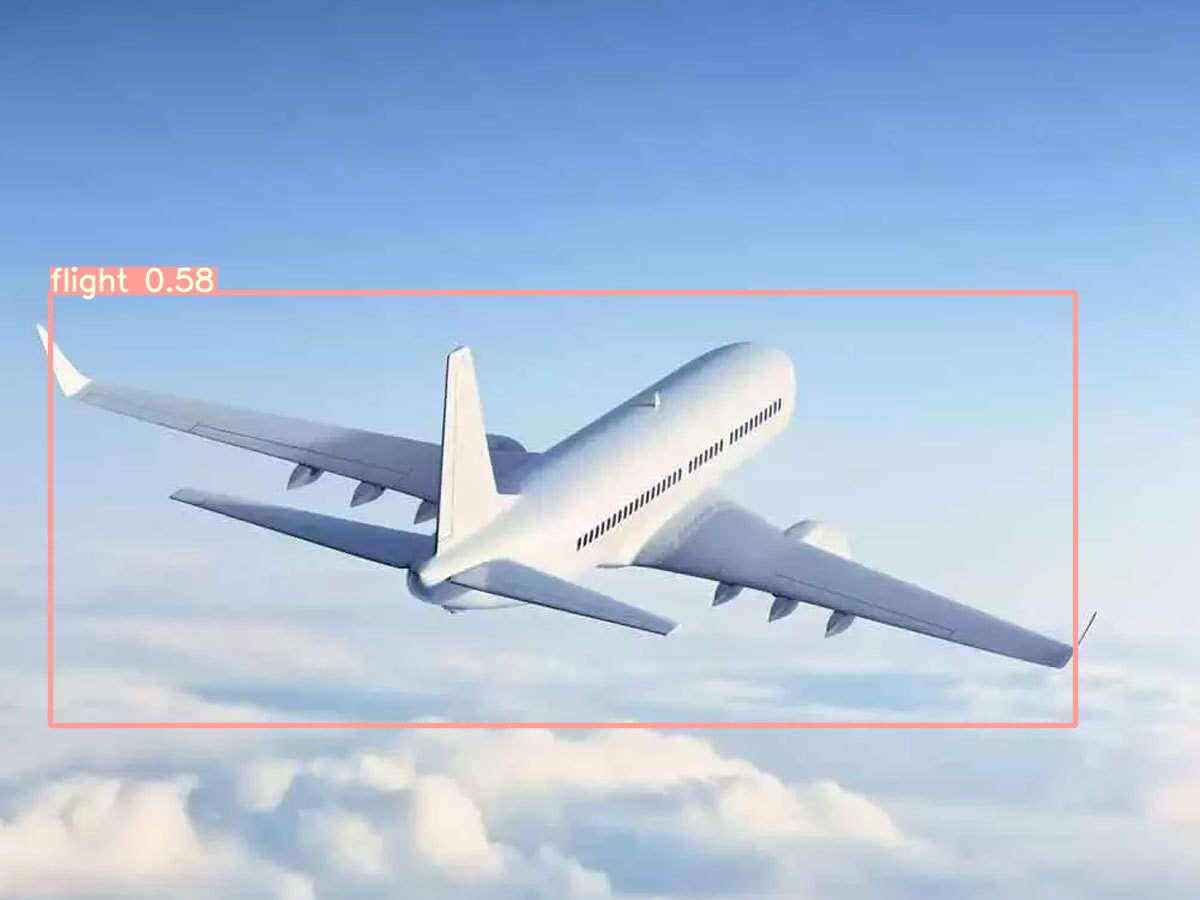

In [34]:
# check in any of runs/detect/exp folder
Image(filename='runs/detect/exp5/003.jpg', width=600)

In [35]:
# check in any of runs/detect/exp folder
!zip -r exps.zip runs/detect/exp5 

  adding: runs/detect/exp5/ (stored 0%)
  adding: runs/detect/exp5/001.jpg (deflated 16%)
  adding: runs/detect/exp5/002.jpg (deflated 11%)
  adding: runs/detect/exp5/004.jpg (deflated 11%)
  adding: runs/detect/exp5/003.jpg (deflated 19%)
